In [1]:

import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets = {}
p_H0 = 5e-8

In [3]:
# MORNING MEASUREMENT
# Define dataset
filename = 'data/VAC1 - V6 - delta V(p_H).csv'

p_H, n_SP, delta_t = np.loadtxt(
    fname=filename,
    delimiter=',',
    unpack=True,
    skiprows=1
)

# Define the volume of one scale part [l] TODO
V_SP = 0.1e-3

# Convert the scale parts to volumes
delta_V = n_SP * V_SP

# Define ambient air pressure [mbar]
p_L = 1015

# Calculate the 'Saugvermögen'
S = delta_V / delta_t * (p_L + 530) / (p_H - p_H0)

# Store dataset in dict dataset
datasets['vormittags'] = (p_H, S)

In [4]:
# EVENING MEASUREMENT
# Define dataset
filename = 'data/Messwerte Richard VAK1 - Saugvermögen Turbomolekular.csv'

p_H, delta_V, delta_t = np.loadtxt(
    fname=filename,
    delimiter=',',
    unpack=True,
    skiprows=1,
    usecols=[0, 1, 2]
)

# Convert delta_V to [l]
delta_V /= 1000

# Define ambient air pressure [mbar]
p_L = 1020

# Calculate the 'Saugvermögen'
S = delta_V / delta_t * (p_L + 530) / (p_H - p_H0)

# Store dataset in dict dataset
datasets['nachmittags'] = (p_H, S)

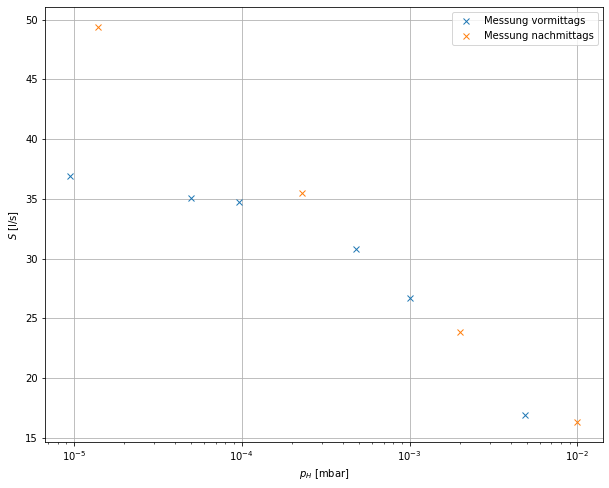

In [5]:
# Plot the resulting data
# Plot the data
fig, ax = plt.subplots(figsize=[10,8])
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('$p_H$ [mbar]')
ax.set_ylabel('$S$ [l/s]')

for dataset, (p_H, S) in datasets.items():
    # Plot measurement data
    ax.plot(p_H, S, 'x', label=f'Messung {dataset}')

ax.legend()

fig.savefig('figs/aufgabe4.pdf', bbox_inches='tight')